# Intro to Machine Learning - 0 to 100

Machine learning and AI can be broadly described as software which attempts to mimic human intelligence. This definition attempts to cover everything in the field - from the days of nested `if` statements to the complex, mathematical functions we see today. Below is the "classic" view of machine learning.

![image1](../img/image1.jpg)

We're going to look at the **machine learning** section of the diagram. Modern machine learning is mathematically motivated, with the goal being to teach a machine to learn some task. More commonly, this "machine" isn't a conscious, sentient being, but the parameters of a mathematical function. The _input_ to machine learning is data, and the _output_ is a function.



## Goals of this Tutorial

1. Understand _fundamentally_ how machine learning works and the "general" math behind it.
2. Be able to apply some practical skills to classic machine learning problems.
3. Better identify potential machine learning use cases in software applications.

### Quick Jupyter Overview

This is a Python jupyter notebook. You can press **shift+enter** to run through code/markdown cells. The Python environment will be modified as you go. 

These notebooks are popular for teaching and experimentation. The markdown cells provide nice compliments to segments of code, and the notebook format lends itself well to the iterative nature of data science.

In [1]:
## some python code
x = 5
y = 7

In [2]:
## more code
print(x+y) # add
print(x-y) # subtract
print(x*y) # multiply
print(x**y) # exponent
print(x/y) # division
print(x//y) # floor division

12
-2
35
78125
0.7142857142857143
0


## A Super Trivial Amount of Math - Linear Regression

Linear regression is often considered the basis of machine learning. It involves fitting a line to some data $x$ in order to predict $y$, where $y$ is a continous variable. You remember this from 8th grade as $y = mx + b$.

For instance say we have data from two variables that have a linear correlation, $x$ and $y$. We want to create a function with input $x$ that we can use to predict $y$, We want to find and represent the _relationship_ between these two variables.

| x   | y   |
|-----|-----|
| 1.2 | 1.4 |
| 2.1 | 2.5 |
| 3.3 | 3.6 |


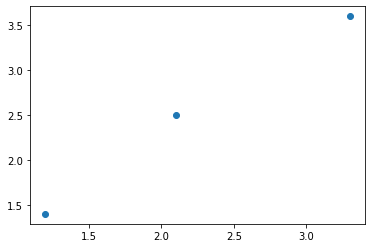

In [3]:
# library imports 
import matplotlib.pyplot as plt
%matplotlib inline

# python lists to represent the data
x = [[1.2],[2.1],[3.3]] 
y = [1.4,2.5,3.6]

# plot the points in 2 dimensions
plt.scatter(x, y) 
plt.show() 

When we model this relationship using the classic linear function $y = mx + b$, this will be our _objective function_, the final output of our machine learning problem. 

The actual machine learning involves finding the *best values* for $m$ and $b$. Let's try some example values to see how they look for our data.

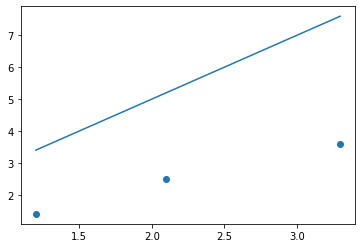

In [4]:
# guess our unknown m and b values to find a good line
m = 2
b = 1

# function for y=mx+b
def function(x, m, b):
    y = m*x + b
    return y

def get_predictions(x):
    # empty list
    predictions = []

    # for each data point in x
    for point in x:
        # pass it through the y=mx+b function to get our "y" guess
        predictions.append(function(point[0], m, b))
        
    return predictions

predictions = get_predictions(x)

# plot line and points
plt.scatter(x, y) 
plt.plot(x, predictions) 
plt.show()

We can consistently "guess" these parameters, but to actually find the best function we need to approach this mathematically. What if we had a way to define how "good" a model was? We can actually do this by trying to minimize the prediction error.

By choosing parameters that minimize the prediction error, we get the best, most "intelligent" function to describe our data. Now we need a function for error, or as it's known a _cost function_. 

A classic cost function here would be the mean squared error, the difference between the actual values ($y$) and the values predicted by the current parameters of our objective function.

*Objective function (function we want to fit):* $y = mx + b$

*Cost function (determines best params for objective):* $(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - (mx_{i} + b))^{2}$

Let's calculate our error in Python a bit.

In [5]:
# imports
import numpy as np

# play with m and b
m = 2
b = 1

# get predictions for our chosen m and b values
predictions = get_predictions(x)

# calculate the cost
mse = np.square(np.subtract(y, predictions)).mean() 

print(f"MSE for b={b} and m={m} is: ", mse)

MSE for b=1 and m=2 is:  9.096666666666666


Let's look closer at our cost function. Notice when we plot this function, we get a parabola. The bottom of that parabola represents the minimum error, and the best parameters of our objective function!

To actually find that minimum, machine learning uses calculus and linear algerbra which we'll skip today. But conceptually,it's relly easy just to picture this:

![image](../img/image4.jpg)

Let's show how we might do actual linear regression using standard ML Python libraries (you can also do this easily from scratch, but it's a bit overbearing for this tutorial).

In [6]:
# most common ml library
from sklearn.linear_model import LinearRegression

# instantiate class and train model on our data
regressor = LinearRegression()
regressor.fit(x, y)

# print b and m
print(regressor.intercept_)
print(regressor.coef_) # y = 1.04x + 0.21 is the function that minimizes the error for hits dataset

0.21081081081081132
[1.04054054]


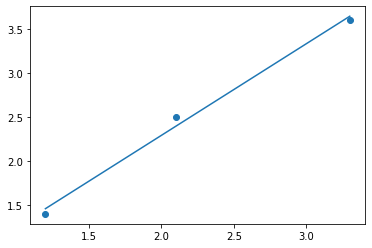

In [7]:
predictions = regressor.predict(x)

# show points
plt.scatter(x, y)
# plot line (our predictions)
plt.plot(x, predictions) 
plt.show()

The last thing we may want to consider here might be a metric to optimize. While mean squared error is our cost function, the "error" (difference between y and y predictions) can vary wildly. If we're predicting values in the range (0,1) then our error will be miniscule compared to predicting values in the millions.

Common metrics are things like **accuracy**: the percentage of correctly classified inputs. These metrics are consistent and interpretable. 

For this problem, we are predicting a continuous output and thus need to adapt a bit. A common metric for problems like this is **$R^2$** **(R squared)**: the proportion of variance explained by the data. Not going to go deeply into this, but like accuracy it ranges between (0,1) and is a good measure of how well a model is performing.

Most machine learning packages have a default `score` function to analyze the performance.

In [8]:
# fake data, basically perfect model with a 1.0 R^2
regressor.score(x,y)

0.9932432432432433

In [9]:
# note: to view docs on a class, method or function use the ?
?regressor.score

The above example just uses one "feature" (common term for function inputs), $x$, but we can have as many features as we like. If we expand our function to $y = m_1x_1 + m_2x_2 + b$, we can use more than one feature!

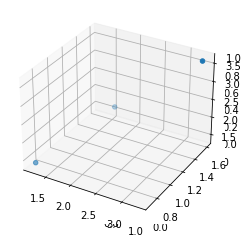

In [10]:
import numpy as np
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

# now we have 2 features, x1 and x2, so we have 2 coefficients to approximate
x = [[1.2, 0.7],[2.1, 1.2],[3.3, 1.6]] 

# separate the features for plotting purposes
x1 = [i[0] for i in x]
x2 = [i[1] for i in x]

# same as before
y = [1.4,2.5,3.6]

# 3d plot now that we have more than 2 dimensions
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(x1, x2, y)
plt.show()

In [11]:
regressor = LinearRegression()
regressor.fit(x, y)

print(regressor.intercept_)
print(regressor.coef_) # y = 0.45x_1 + 1.38x_2 - 0.112

-0.11250000000000027
[0.45833333 1.375     ]


## Types of Machine Learning

Machine learning is typically bucketed into two categories: supervised and unsupervised. Today we'll focus on supervised.

### Supervised Learning
Supervised learning has a known output value $y$, whereas unsupervised there is no known value. The example we did above is supervised, since we have a known $y$ value with which to train our data.

### Unsupervised Learning
We won't focus on this today, but unsupervised learning is when you have input features $x$ but no $y$ examples in the data. You can performs actions such as clustering, which group the data based on their distributions - but you can't perform the "prediction" of any known values.

### Regression
Within supervised learning, there are also two general categories: regression and classification. The key difference is in the output type. In the above example we were doing regression, predicting a _continuous_ variable output rangine from negative infinity to positive infinity. An example would be predicting house prices using data on the homes (although house prices in practice obviously have limitations).

**Some standard regression models:**
- linear regression
- polynomial regression (same but with polynomial function, $y = mx^2 + b$)
- ridge and lasso regression (regression with a penalization for large coefficients)
- decision tree/random forest regressor (recursive algorithm that generates a tree of splits)


### Classification
Classification instead focuses on a discrete set of values, such as a binary classifion (predicting 0 or 1 for a given input). An example of this would be predicting whether or not someone has a malignant tumor, based on the input of tumor size, weight, or any other features.

**Some standard classification models:**
- logistic regression (transformed linear regression to return probability for discrete classes, 0 or 1)
- decision tree or random forest (recursive tree based models that resolve to a class)
- support vector machine (model decision boundary between classes)
- deep learning models (image classification, text classification)

![image3](../img/image3.png)



## Real Regression Example - House Prices

Let's do a regression problem with a real dataset. This will be a regression problem where we want to predict the price of a house based on the features of the house (bedrooms, bathrooms, etc...). For more info on the dataset you can refer to [kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction#). I have included the data here for ease.

In [12]:
# dataframe library for tables, lots of sql-like functionality 
import pandas as pd 

# load datafram from csv file
df = pd.read_csv("kc_house_data.csv") 

# first 5 rows
df.head() 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


The `pandas` library is a data science and machine learning staple. It comes with a ton of OOTB features for data analysis, manipulation and exploration.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [14]:
# take a look at bedrooms
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

## Data Exploration

A basic strategy in data science to explore, understand, and engineer data in accordance with the problem. Blindly trining models is easy, but understanding the real world and statistical relationship between variables is the "scientific" aspect of data science. 

For instance, I might assume that the more square footage a house has - the more expensive it is going to be. Let's take a look at that.

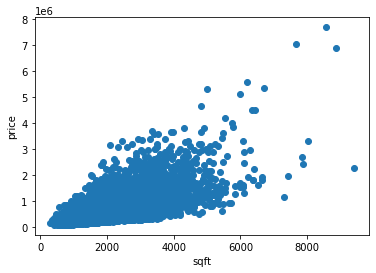

In [15]:
plt.scatter(df['sqft_above'], df['price'])
plt.xlabel("sqft")
plt.ylabel("price")
plt.show()

We can see what while the data are not perfectly linear, in general the price (y-axis) does seem to increase with square footage (x-axis).

In a real situation, we might do many more plot and charts - but for the purposes of this demo let's say this is as far as we go.

## Feature Engineering

In addition to the data our model came with, we might want to include new features using our own domain knowledge. Adding human knowledge to a model often gives them an edge, especially if the model itself is relatively simple and incapable of capturing the vast complexities of data.

Let's create a new feature in our data using other features. We're going to sum the other sqft features into a `total_sqft` feature, something people might consider when pricing a house.

Obviously, this is a trivial example. In the real word, there may be more complex transformations or even additional data sources we may have to clean and take into account.

In [16]:
sqft_features = ['sqft_living','sqft_lot','sqft_above','sqft_basement']

# sum the features above into one column
df['total_sqft'] = df[sqft_features].sum(axis=1)

## The Machine Learning Part

Contrary to popular belief, the actual machine learning portion of machine learning problems is pretty small. most data are messy, and you spend like...90% of the time trying to massage and engineer the data as opposed to training dope models that change the landscape of software forever. The actual machine learning part usually follows a workflow like this:

1. Split the data into a "train" set for training and a "test" set for evaluation
2. Choose a model and features we want to fit to the data
3. Choose a metric to optimize (accuracy for classification, or R squared for regression)
4. Choose the model specific hyperparameters (model "settings")
5. Train the model on the train data
6. Evalaute on the test set using the metric

I totally stole some of the following code from [this medium article](https://towardsdatascience.com/regression-using-sklearn-on-kc-housing-dataset-1ac80ca3d6d4). We're going to use 2 models, a classic linear regression and a more performant tree based model.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [18]:
# selecting features we want to use
features = ["bedrooms","bathrooms","sqft_living","sqft_above","grade",
            "floors","view",'sqft_lot','floors','waterfront','zipcode','total_sqft'] # choose features

# getting those features from the dataframe
x = df[features]
y = df["price"]

# splits data into 80% train 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, 
                                                    random_state=3) 



Now we'll train two regression models, a classic multiple linear regression and a more complex tree based model. We will compared the $R^2$ score (classic regression metric that ranges between 0 and 1) for our train and test datasets. 

The goal is to have an $R^2$ as close to 1.0 as possible for both the train AND test datasets. Having a high training dataset score but a lower test dataset score means that our model is _overfitting_ to the data. It's common to have models perform well on data they've seen before, but poorly on unforeseen data. This means the model generlizes poorly to new data.

In [19]:
model = LinearRegression() # choose model
model.fit(x_train, y_train)
print("Train R Squared: ", model.score(x_train, y_train))
print("Test R Squared: ", model.score(x_test, y_test)) # low train and test r squared

Train R Squared:  0.5978100611695987
Test R Squared:  0.6075182153046089


In [20]:
model = RandomForestRegressor(n_estimators=100) # choose model with settings
model.fit(x_train, y_train)
print("Train R Squared: ", model.score(x_train, y_train))
print("Test R Squared: ", model.score(x_test, y_test)) # very high train score, but model is overfit 

Train R Squared:  0.9732629341456014
Test R Squared:  0.8239199231925343


## Identifying Machine Learning Problems and Real World Examples

The use cases for machine learning vary wildly from org to org. Some groups use it primarily for business intelligence and expoloration, while groups in R&D may use it to optimize drug design and discovery.

As a person who primarily works with unstructured data (text, images) I have **2 key requirements** a machine learning project has to meet:

1. There is some tedious or manual process that currently requires _human_ decision making
2. There is data (preferably already labeled) for the problem at hand 

Imagine a pharmaceutical company wants to use text examples to automate the process of finding claims about their drugs from free text. They would need 2 things:

1. **positive examples** that exemplify the target class: drug claims 
2. **negative examples** that do not exemplify this: literally any other kind of text

In [31]:
claims = ["This drug is good",
         "Drugs are bad",
         "Actually drugs are tight",
         "Big fan of drugs they're great",
         "Drugs helped me with xyz problem"]

not_claims = ["beep beep boop",
             "jeffrey epstein didn't kill himself",
             "and then just",
             "some other random examples",
             "of miscellanous text"]

# this is where I start to get weird and lazy with the code
tmp = list(map(lambda x: (x, 1), claims)) + list(map(lambda x: (x, 0), claims))
df = pd.DataFrame(tmp, columns = ['text','is_claim'])
df

,text,is_claim
0,This drug is good,1
1,Drugs are bad,1
2,Actually drugs are tight,1
3,Big fan of drugs they're great,1
4,Drugs helped me with xyz problem,1
5,This drug is good,0
6,Drugs are bad,0
7,Actually drugs are tight,0
8,Big fan of drugs they're great,0
9,Drugs helped me with xyz problem,0


Once we have those things, it's basically in the bag. Machine learning is fueled, and entirely dependent on sound data. Regardless of how cool the math or model is. The primary philosophy of ML is "garbage in, garbage out". The better the curated dataset, the more possibilities.

Just for fun, here's some code to build a model to classify the above text. We need to create-*